In [1]:
#Importing libraries and dataset
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df= pd.read_csv('bigml_59c28831336c6604c800002a.csv')

In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


no missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

Phone number and area code are irrelevent columns

In [5]:
df = df.drop(['phone number','area code'], axis = 1)

state column

In [6]:
df['state'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['state'] = le.fit_transform(df['state'])

International and voice mail plan

In [8]:
print(df['international plan'].unique())

print(df['voice mail plan'].unique())

['no' 'yes']
['yes' 'no']


In [9]:
df['international plan'] = pd.get_dummies(df['international plan'],drop_first = True)

df['voice mail plan'] = pd.get_dummies(df['voice mail plan'],drop_first = True)

churn(output column)

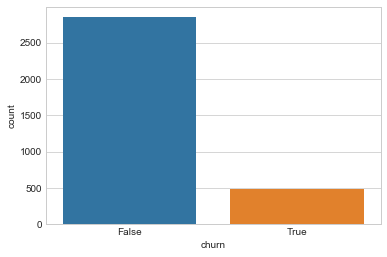

In [10]:
sns.countplot(df['churn'])

In [11]:
df['churn'] = pd.get_dummies(df['churn'],drop_first = True)

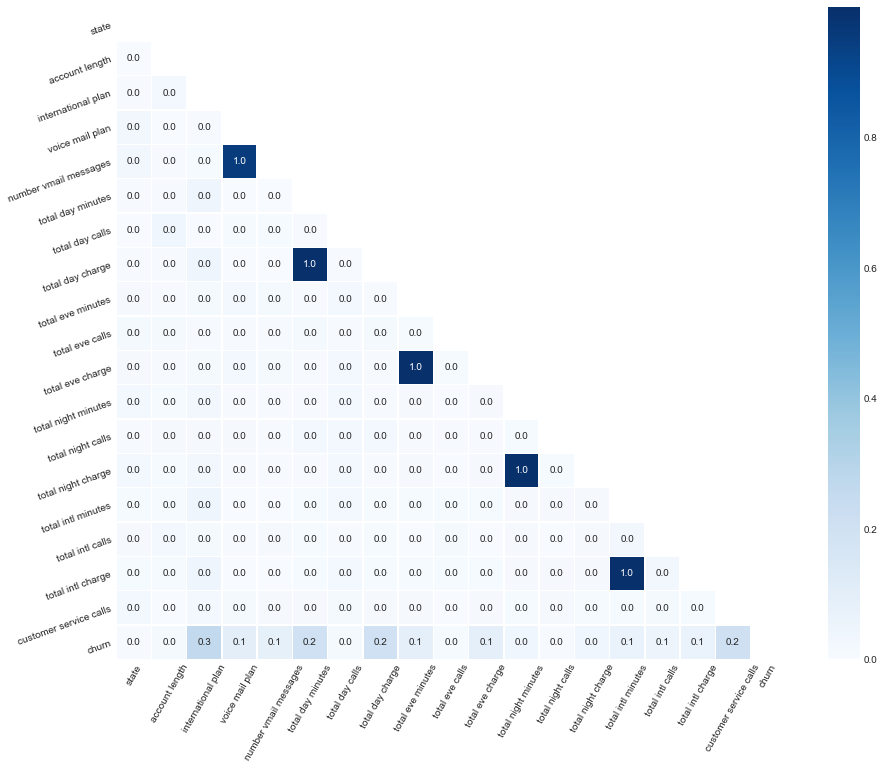

In [12]:
plt.figure(figsize=(15,12)) 

corr = abs(df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

sns.heatmap(lower_triangle, annot=True, linewidths=.5, fmt= '.1f',cmap = 'Blues',mask = mask,xticklabels = corr.index, yticklabels = corr.columns)

plt.xticks(rotation = 60)
plt.yticks(rotation = 20) 
plt.show()

from the above correlation plot some columns are 100% correlated which can be dropped

In [13]:
df = df.drop(['voice mail plan','total day minutes','total eve minutes','total night minutes','total intl minutes'], axis = 1)

preparing the data

In [23]:
X = df.drop('churn',axis=1)     
Y = df['churn']

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

C:\Users\puneeth\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


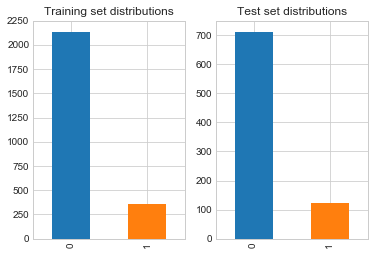

In [25]:
plt.subplot(1,2,1)
y_train.value_counts().plot(kind = 'bar')
plt.subplot(1,2,1).title.set_text('Training set distributions')

plt.subplot(1,2,2)
y_test.value_counts().plot(kind = 'bar')
plt.subplot(1,2,2).title.set_text('Test set distributions')

plt.show()

logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=10000)

model_lr.fit(x_train, y_train)

y_predict_lr= model_lr.predict(x_test)

Classification Report and confusion matrix for Logistic Regression model

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       712
           1       0.50      0.16      0.25       122

    accuracy                           0.85       834
   macro avg       0.69      0.57      0.58       834
weighted avg       0.82      0.85      0.82       834



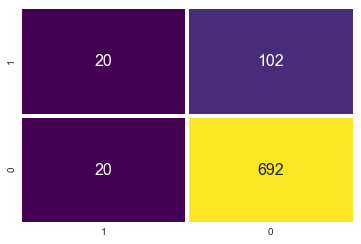

In [62]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

cm_lr = metrics.confusion_matrix(y_test, y_predict_lr,labels=[1,0])
sns.heatmap(cm_lr, annot= True, yticklabels = [1,0], xticklabels = [1,0], cmap = 'viridis',annot_kws={"size": 16},linewidths= 3,fmt='g',cbar = False)


print("Classification Report and confusion matrix for Logistic Regression model")
print("")
print(classification_report(y_test, y_predict_lr))

K- Nearest Neighbours

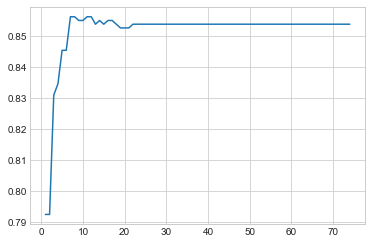

In [35]:
#checking what value of 'K' gives the highest accuracy on the testing dataset
from sklearn.neighbors import KNeighborsClassifier
scores =[]
for k in range(1,75):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(x_train, y_train)
    scores.append(NNH.score(x_test, y_test))

plt.plot(range(1,75),scores)

In [40]:
model_KNN = KNeighborsClassifier(n_neighbors = 7)

model_KNN.fit(x_train, y_train)

y_predict_KNN= model_KNN.predict(x_test)

Classification Report and confusion matrix for K-Nearest Neighbours model

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       712
           1       0.44      0.03      0.06       122

    accuracy                           0.85       834
   macro avg       0.65      0.51      0.49       834
weighted avg       0.80      0.85      0.79       834



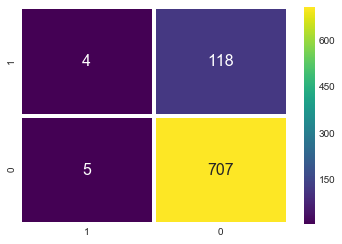

In [63]:
cm_knn = metrics.confusion_matrix(y_test, y_predict_KNN,labels=[1,0])
sns.heatmap(cm_knn, annot= True, yticklabels = [1,0], xticklabels = [1,0], cmap = 'viridis',annot_kws={"size": 16},linewidths= 3,fmt='g')


print("Classification Report and confusion matrix for K-Nearest Neighbours model")
print("")
print(classification_report(y_test, y_predict_KNN))

Random forest

In [49]:
from sklearn.ensemble import RandomForestClassifier


model_rfcl = RandomForestClassifier()

param_grid_rfcl = {'max_features': list(range(2,8)) , 'max_depth':list(range(2,8))}

from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(model_rfcl,param_grid_rfcl,cv=5)

gs.fit(x_train, y_train)

gs.best_params_

{'max_depth': 7, 'max_features': 7}

In [50]:
model_rfcl = RandomForestClassifier(max_depth=7, max_features= 7)

model_rfcl.fit(x_train, y_train)

y_predict_rfcl= model_rfcl.predict(x_test)

Classification Report and confusion matrix for Random Forest Classifier

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       712
           1       0.92      0.71      0.80       122

    accuracy                           0.95       834
   macro avg       0.93      0.85      0.89       834
weighted avg       0.95      0.95      0.95       834



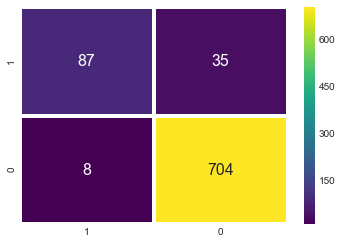

In [65]:
cm_rfcl = metrics.confusion_matrix(y_test, y_predict_rfcl,labels=[1,0])
sns.heatmap(cm_rfcl, annot= True, yticklabels = [1,0], xticklabels = [1,0], cmap = 'viridis',annot_kws={"size": 16},linewidths= 3,fmt='g')


print("Classification Report and confusion matrix for Random Forest Classifier")
print("")
print(classification_report(y_test, y_predict_rfcl))

Decision tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()

param_grid_dt = {'max_features': list(range(1,11)) , 'max_depth':list(range(1,11))}

from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(model_dt,param_grid_dt,cv=5)

gs.fit(x_train, y_train)

gs.best_params_

{'max_depth': 8, 'max_features': 10}

In [67]:
model_dt = DecisionTreeClassifier(max_depth=8, max_features= 10)

model_dt.fit(x_train, y_train)

y_predict_dt= model_dt.predict(x_test)

Classification Report and confusion matrix for Random Forest Classifier

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       712
           1       0.78      0.66      0.72       122

    accuracy                           0.92       834
   macro avg       0.86      0.82      0.84       834
weighted avg       0.92      0.92      0.92       834



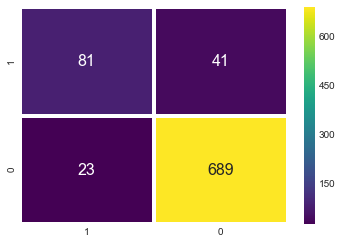

In [68]:
cm_dt = metrics.confusion_matrix(y_test, y_predict_dt,labels=[1,0])
sns.heatmap(cm_dt, annot= True, yticklabels = [1,0], xticklabels = [1,0], cmap = 'viridis',annot_kws={"size": 16},linewidths= 3,fmt='g')


print("Classification Report and confusion matrix for Random Forest Classifier")
print("")
print(classification_report(y_test, y_predict_dt))

Random forest turned out to be the best classifier with 94.8% accuracy